In [288]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from IPython.display import HTML

Loading the datset


In [289]:
boston=load_boston()
#Description of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [290]:
#putting the data into panda dataframes
features=pd.DataFrame(boston.data,columns=boston.feature_names)

features


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


# Preprocessing

In [291]:
#performing feature scaling on feature
standardscaler=preprocessing.StandardScaler()
features_scaled=standardscaler.fit_transform(features)
features_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [292]:
target=pd.DataFrame(boston.target,columns=['target'])
target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [293]:
standardscaler=preprocessing.StandardScaler()
target_scaled=standardscaler.fit_transform(target)
target_scaled

array([[ 0.15968566],
       [-0.10152429],
       [ 1.32424667],
       [ 1.18275795],
       [ 1.48750288],
       [ 0.6712218 ],
       [ 0.03996443],
       [ 0.49708184],
       [-0.65659542],
       [-0.39538548],
       [-0.81985164],
       [-0.39538548],
       [-0.09064054],
       [-0.23212926],
       [-0.47157171],
       [-0.286548  ],
       [ 0.06173193],
       [-0.54775795],
       [-0.25389676],
       [-0.47157171],
       [-0.97222411],
       [-0.31919924],
       [-0.79808414],
       [-0.87427038],
       [-0.75454915],
       [-0.93957286],
       [-0.64571167],
       [-0.84161913],
       [-0.44980422],
       [-0.16682677],
       [-1.07017784],
       [-0.87427038],
       [-1.0157591 ],
       [-1.02664285],
       [-0.98310786],
       [-0.39538548],
       [-0.27566425],
       [-0.16682677],
       [ 0.23587189],
       [ 0.89978051],
       [ 1.34601416],
       [ 0.4426631 ],
       [ 0.30117438],
       [ 0.23587189],
       [-0.14505928],
       [-0

In [271]:
#Concatenating features and target into one dataframe, setting axis=1 cocatenates it column wise
df=pd.concat([features,target], axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


# Visualization

In [272]:
#setting precision to 2 places of decimal using round
df.describe().round(decimals=2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


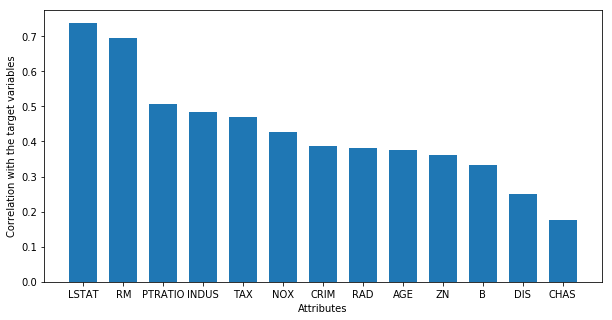

In [294]:
#calculating correlation between every column on the data
corr=df.corr('pearson')
#taking absolute value of correlation
corrs=[abs(corr[attr]['target'])for attr in list(features)]
#making list of pairs (corr,feature)
l=list(zip(corrs,list(features)))
#sort the list of pairs in descending order,according to correlation value
l.sort(key=lambda x : x[0], reverse=True)
#unzipping pairs to two lists
#zipping(*l) which takes input like[[a,b], [c,d]] and returns like [[a,c], [b,d]]
corrs, labels=list(zip((*l)))
#plot correlations wrt the target variable as a bar graph
index = np.arange(len(labels))
plt.figure(figsize=(10,5))
plt.bar(index,corrs,width=0.7)
plt.xlabel('Attributes')
plt.ylabel('Correlation with the target variables')
plt.xticks(index, labels)
plt.show()



# Normalization


In [274]:
X=df['LSTAT'].values
Y=df['target'].values
#before Normalization
Y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [275]:
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X.reshape(-1,1))
X=X[:, -1]
y_scaler =MinMaxScaler()
Y =y_scaler.fit_transform(Y.reshape(-1,1))
Y=Y[:, -1]

In [276]:
#after normalization
Y[:5]

array([0.42222222, 0.36888889, 0.66      , 0.63111111, 0.69333333])

# Splitting the data


In [278]:
#splitting the data into 80%train data and 20% test data
xtrain, xtest,ytrain,ytest =train_test_split(X, Y, test_size=0.2)
xtrain=xtrain.reshape(-1,1)
ytrain=ytrain.reshape(-1,1)
xtest=xtest.reshape(-1,1)
ytest=ytest.reshape(-1,1)

# Training the model

In [279]:
# define regression object
lm = LinearRegression()


In [280]:
#fitting the model
lm.fit(xtrain,ytrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [281]:
#parameter of feature
lm.coef_

array([[-0.7467022]])

# Making prediction

In [282]:
#making prediction
predictions = lm.predict(xtest)

Text(0, 0.5, 'Predictions')

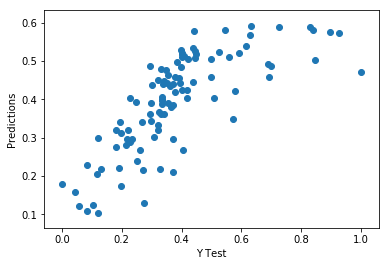

In [283]:
#plotting
plt.scatter(ytest,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predictions')


In [284]:
# import evaluation metrics
from sklearn import metrics
print('MSE: ',metrics.mean_squared_error(ytest,predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(ytest,predictions)))


MSE:  0.016928636834684232
RMSE:  0.13011009505293675


In [285]:
p=pd.DataFrame(list(zip(xtest,ytest,predictions)),columns=['x','target_y','predictions'])
p

,x,target_y,predictions
0,[0.060430463576158944],[0.9266666666666667],[0.5721818901286192]
1,[0.3109823399558499],[0.3711111111111111],[0.38509425190706664]
2,[0.28725165562913907],[0.41777777777777786],[0.4028140061879626]
3,[0.23620309050772625],[0.3377777777777778],[0.44093208225733177]
4,[0.12775938189845476],[0.5911111111111111],[0.5219072384479376]
5,[0.44150110375275936],[0.22666666666666668],[0.28763560336213895]
6,[0.266280353200883],[0.3777777777777778],[0.41847332392456826]
7,[0.24420529801324503],[0.36],[0.4349568162788901]
8,[0.46771523178807944],[0.26],[0.26806145619138183]
9,[0.3170529801324503],[0.36444444444444446],[0.38056129150962814]


# Plotting the predicted values against the target values


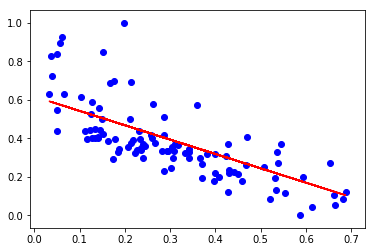

In [286]:
plt.scatter(xtest, ytest,color='b')
plt.plot(xtest,predictions,color='r')

# Reverting Normalization to obtain predicted prices of house

In [287]:
#reshaping to change the shape required by scaler
predictions=predictions.reshape(-1,1)
xtest=xtest.reshape(-1,1)
ytest=ytest.reshape(-1,1)
xtest_scaled=x_scaler.inverse_transform(xtest)
ytest_scaled=y_scaler.inverse_transform(ytest)
predictions_scaled=y_scaler.inverse_transform(predictions)
#to remove extra dim
xtest_scaled=xtest_scaled[:,-1]
ytest_scaled=ytest_scaled[:,-1]
predictions_scaled=predictions_scaled[:,-1]

p=pd.DataFrame(list(zip(xtest_scaled, ytest_scaled,predictions_scaled)),columns=['x','target_y','predictions'])
p=p.round(decimals=2)
p

,x,target_y,predictions
0,3.92,46.7,30.75
1,13.00,21.7,22.33
2,12.14,23.8,23.13
3,10.29,20.2,24.84
4,6.36,31.6,28.49
5,17.73,15.2,17.94
6,11.38,22.0,23.83
7,10.58,21.2,24.57
8,18.68,16.7,17.06
9,13.22,21.4,22.13
